In [59]:
from nilearn import datasets

dataset = datasets.fetch_atlas_aal(version='SPM12')
atlas_filename = dataset.maps
labels = dataset.labels

print(f"Atlas ROIs are located in nifti image (4D) at: {atlas_filename}")

# One subject of brain development fMRI data
#data = datasets.fetch_development_fmri(n_subjects=1, reduce_confounds=True)
#fmri_filenames = data.func[0]
#reduced_confounds = data.confounds[0]  # This is a preselected set of confounds

Atlas ROIs are located in nifti image (4D) at: /Users/alexandresayal/nilearn_data/aal_SPM12/aal/atlas/AAL.nii


In [60]:
import pandas as pd
import numpy as np

from src.my_settings import settings
sett = settings()

# one subject
fmri_filenames = '/Volumes/T7/BIDS-MUSICNF/derivatives/fmriprep24/sub-02/func/sub-02_task-sham_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
confound_filenames = '/Volumes/T7/BIDS-MUSICNF/derivatives/fmriprep24/sub-02/func/sub-02_task-sham_run-1_desc-confounds_timeseries.tsv'

# load and trim confounds
reduced_confounds = pd.read_csv(confound_filenames, delimiter='\t')
reduced_confounds = reduced_confounds.loc[:, sett["confounds_of_interest"]]
reduced_confounds.fillna(0, inplace=True)
reduced_confounds


,csf,white_matter,trans_x,trans_x_derivative1,trans_x_power2,trans_x_derivative1_power2,trans_y,trans_y_derivative1,trans_y_power2,trans_y_derivative1_power2,...,rot_x_power2,rot_x_derivative1_power2,rot_y,rot_y_derivative1,rot_y_power2,rot_y_derivative1_power2,rot_z,rot_z_derivative1,rot_z_power2,rot_z_derivative1_power2
0,696.718265,539.010346,-0.042553,0.000000,0.001811,0.000000e+00,-0.000153,0.000000,2.333073e-08,0.000000,...,2.536566e-06,0.000000e+00,-0.000196,0.000000,3.833490e-08,0.000000e+00,-0.001612,0.000000,0.000003,0.000000e+00
1,695.056710,538.389756,-0.042569,-0.000016,0.001812,2.464900e-10,-0.008446,-0.008293,7.133407e-05,0.000069,...,2.488569e-06,2.292196e-10,-0.000559,-0.000363,3.127069e-07,1.320661e-07,-0.001294,0.000319,0.000002,1.015378e-07
2,691.833985,536.087564,-0.042569,0.000000,0.001812,0.000000e+00,-0.017149,-0.008703,2.940813e-04,0.000076,...,3.081534e-06,3.165197e-08,-0.000559,0.000000,3.127069e-07,0.000000e+00,-0.001294,0.000000,0.000002,0.000000e+00
3,692.172621,525.111729,-0.042572,-0.000003,0.001812,7.840000e-12,0.018661,0.035809,3.482217e-04,0.001282,...,2.889388e-06,3.092472e-09,-0.000374,0.000185,1.400601e-07,3.420872e-08,-0.001294,0.000000,0.000002,0.000000e+00
4,691.945952,535.590829,-0.032320,0.010252,0.001045,1.050974e-04,-0.026564,-0.045225,7.056408e-04,0.002045,...,3.818077e-06,6.460239e-08,-0.000559,-0.000185,3.127069e-07,3.420872e-08,-0.001554,-0.000260,0.000002,6.772486e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,691.268595,521.203773,0.045130,-0.001532,0.002037,2.347637e-06,0.018921,-0.021101,3.580156e-04,0.000445,...,2.633772e-06,9.048423e-07,-0.002237,-0.000122,5.004706e-06,1.491329e-08,-0.001493,-0.000404,0.000002,1.631675e-07
252,690.617368,521.325716,0.027705,-0.017426,0.000768,3.036481e-04,0.044471,0.025550,1.977670e-03,0.000653,...,5.998224e-07,7.197961e-07,-0.002237,0.000000,5.004706e-06,0.000000e+00,-0.001493,0.000000,0.000002,0.000000e+00
253,689.482894,521.262726,0.028317,0.000612,0.000802,3.746664e-07,0.023254,-0.021217,5.407625e-04,0.000450,...,2.633772e-06,7.197961e-07,-0.001976,0.000261,3.904616e-06,6.817843e-08,-0.001549,-0.000056,0.000002,3.121457e-09
254,690.174559,520.950993,0.015681,-0.012636,0.000246,1.596786e-04,0.054161,0.030907,2.933446e-03,0.000955,...,8.834176e-07,4.664712e-07,-0.002023,-0.000047,4.091598e-06,2.186498e-09,-0.001769,-0.000220,0.000003,4.854972e-08


In [61]:
from nilearn.maskers import NiftiLabelsMasker

masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    verbose=5,
)

# Here we go from nifti files to the signal time series in a numpy
# array. Note how we give confounds to be regressed out during signal
# extraction
time_series = masker.fit_transform(fmri_filenames, confounds=reduced_confounds)

[NiftiLabelsMasker.wrapped] loading data from /Users/alexandresayal/nilearn_data/aal_SPM12/aal/atlas/AAL.nii
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from /Volumes/T7/BIDS-MUSICNF/derivatives/fmriprep24/sub-02/func/sub-02_task-sham_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


In [62]:
labels

['Precentral_L',
 'Precentral_R',
 'Frontal_Sup_L',
 'Frontal_Sup_R',
 'Frontal_Sup_Orb_L',
 'Frontal_Sup_Orb_R',
 'Frontal_Mid_L',
 'Frontal_Mid_R',
 'Frontal_Mid_Orb_L',
 'Frontal_Mid_Orb_R',
 'Frontal_Inf_Oper_L',
 'Frontal_Inf_Oper_R',
 'Frontal_Inf_Tri_L',
 'Frontal_Inf_Tri_R',
 'Frontal_Inf_Orb_L',
 'Frontal_Inf_Orb_R',
 'Rolandic_Oper_L',
 'Rolandic_Oper_R',
 'Supp_Motor_Area_L',
 'Supp_Motor_Area_R',
 'Olfactory_L',
 'Olfactory_R',
 'Frontal_Sup_Medial_L',
 'Frontal_Sup_Medial_R',
 'Frontal_Med_Orb_L',
 'Frontal_Med_Orb_R',
 'Rectus_L',
 'Rectus_R',
 'Insula_L',
 'Insula_R',
 'Cingulum_Ant_L',
 'Cingulum_Ant_R',
 'Cingulum_Mid_L',
 'Cingulum_Mid_R',
 'Cingulum_Post_L',
 'Cingulum_Post_R',
 'Hippocampus_L',
 'Hippocampus_R',
 'ParaHippocampal_L',
 'ParaHippocampal_R',
 'Amygdala_L',
 'Amygdala_R',
 'Calcarine_L',
 'Calcarine_R',
 'Cuneus_L',
 'Cuneus_R',
 'Lingual_L',
 'Lingual_R',
 'Occipital_Sup_L',
 'Occipital_Sup_R',
 'Occipital_Mid_L',
 'Occipital_Mid_R',
 'Occipital_Inf_L'

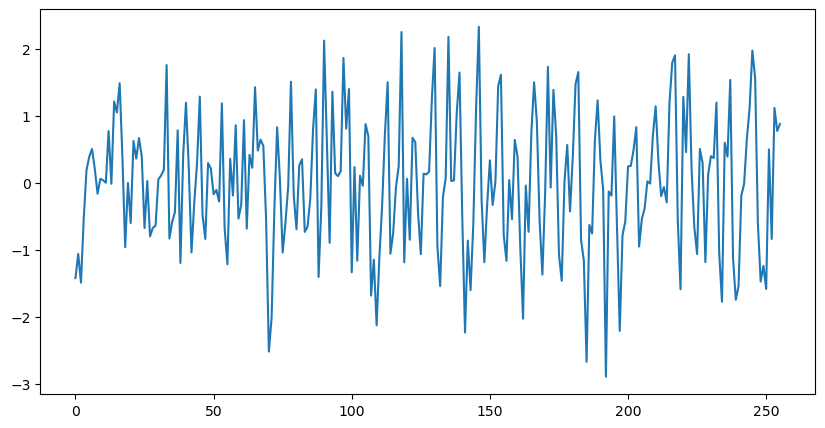

In [63]:
# plot time course of the right amygdala
import matplotlib.pyplot as plt

f = plt.figure(figsize=(10, 5))

# find index of 'Amygdala_L' in labels
amygdala_l_idx = labels.index('Amygdala_L')
plt.plot(time_series[:, amygdala_l_idx])


In [64]:
# Load protocol information
events_tsv_path = '/Volumes/T7/BIDS-MUSICNF/sub-02/func/sub-02_task-nf_run-1_events.tsv'
events = pd.read_csv(events_tsv_path, delimiter='\t')

# add onset and duration in volumes, knowing that the TR is 1.5 seconds. Return as integer
events['onset_volumes'] = (events['onset'] / 1.5).astype(int)
events['duration_volumes'] = (events['duration'] / 1.5).astype(int)

# remove 'Discard', 'RestFinal'
events = events[events['trial_type'] != 'Discard']
events = events[events['trial_type'] != 'RestFinal']

# remove first row
events = events[1:]

# consider a hemodynamic delay of 3 seconds - 2 volumes - and add it to the onset_volumes
events['onset_volumes'] = events['onset_volumes'] + 2

# create a column of offseet volumes
events['offset_volumes'] = events['onset_volumes'] + events['duration_volumes']

events

,onset,duration,trial_type,onset_volumes,duration_volumes,offset_volumes
2,42,30,MotorImagery,30,20,50
3,72,30,Rest,50,20,70
4,102,30,MotorImagery,70,20,90
5,132,30,Rest,90,20,110
6,162,30,MotorImagery,110,20,130
7,192,30,Rest,130,20,150
8,222,30,MotorImagery,150,20,170
9,252,30,Rest,170,20,190
10,282,30,MotorImagery,190,20,210
11,312,30,Rest,210,20,230


In [65]:
# get the MotorImagery events
mi_events = events[events['trial_type'] == 'MotorImagery']
mi_events

,onset,duration,trial_type,onset_volumes,duration_volumes,offset_volumes
2,42,30,MotorImagery,30,20,50
4,102,30,MotorImagery,70,20,90
6,162,30,MotorImagery,110,20,130
8,222,30,MotorImagery,150,20,170
10,282,30,MotorImagery,190,20,210
12,342,30,MotorImagery,230,20,250


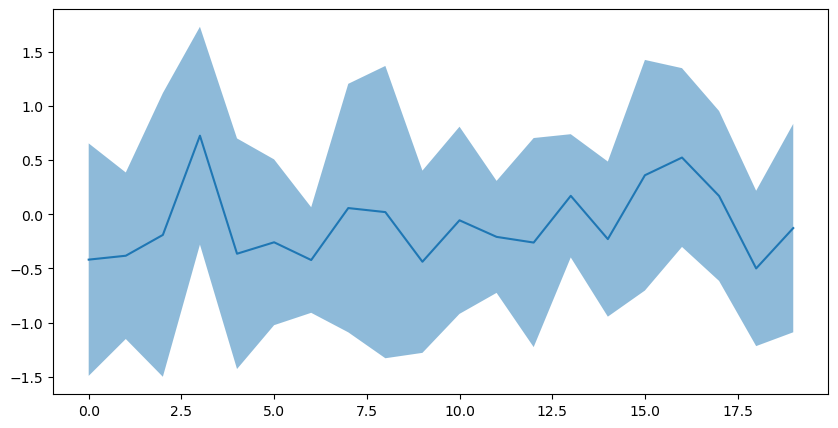

In [66]:
# fetch the timecourse values during the 'MotorImagery' events

# create a matrix (n_trials, n_volumes) to store the timecourse values
n_trials = 6
n_volumes = 20
timecourse_matrix = np.zeros((n_trials, n_volumes))

for ii in range(n_trials):
    onset = mi_events['onset_volumes'].values[ii]
    offset = mi_events['offset_volumes'].values[ii]
    timecourse_matrix[ii, :] = time_series[onset:offset, amygdala_l_idx]

# plot the timecourse values mean + std
f = plt.figure(figsize=(10, 5))
plt.plot(np.mean(timecourse_matrix,axis=0))
plt.fill_between(range(n_volumes),
                 np.mean(timecourse_matrix,axis=0) - np.std(timecourse_matrix,axis=0),
                 np.mean(timecourse_matrix,axis=0) + np.std(timecourse_matrix,axis=0),
                 alpha=0.5)



